In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

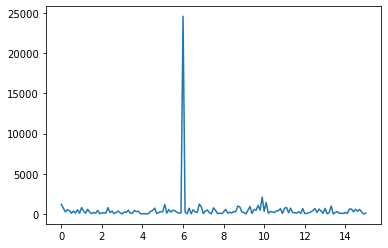

In [2]:
import scipy.io.wavfile
from scipy.io import wavfile
import librosa
import os.path

path="C:\\Users\\안동진\\Downloads"
fname="\\docs_feature_extraction_example.wav"

data, signal = wavfile.read(path+fname)

sampling_rate = 30.0

time = np.arange(0, 10, 1/sampling_rate)

data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)

In [3]:
from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy import sum as npsum


def powerlaw_psd_gaussian(exponent, size, fmin=0):
    try:
        size = list(size)
    except TypeError:
        size = [size]
    
    samples = size[-1]
    
    f = rfftfreq(samples)

    s_scale = f
    fmin = max(fmin, 1./samples) # Low frequency cutoff
    ix   = npsum(s_scale < fmin)   # Index of the cutoff
    if ix and ix < len(s_scale):
        s_scale[:ix] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)
    
    w      = s_scale[1:].copy()
    w[-1] *= (1 + (samples % 2)) / 2. # correct f = +-0.5
    sigma = 2 * sqrt(npsum(w**2)) / samples
    
    size[-1] = len(f)

    dims_to_add = len(size) - 1
    s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]
    
    sr = normal(scale=s_scale, size=size)
    si = normal(scale=s_scale, size=size)
    
    if not (samples % 2): si[...,-1] = 0

    si[...,0] = 0

    s  = sr + 1J * si

    y = irfft(s, n=samples, axis=-1) / sigma
    
    return y

NameError: name 'yy' is not defined

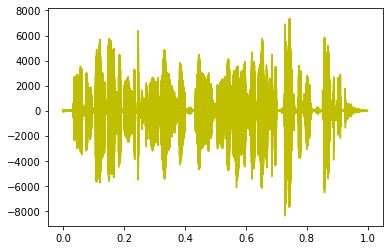

In [4]:
Fs = 183280.
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def powerlaw_psd_gaussian(exponent, size, fmin=0):
    try:
        size = list(size)
    except TypeError:
        size = [size]
    
    samples = size[-1]
    
    f = rfftfreq(samples)

    s_scale = f
    fmin = max(fmin, 1./samples) # Low frequency cutoff
    ix   = npsum(s_scale < fmin)   # Index of the cutoff
    if ix and ix < len(s_scale):
        s_scale[:ix] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)
    
    w      = s_scale[1:].copy()
    w[-1] *= (1 + (samples % 2)) / 2. # correct f = +-0.5
    sigma = 2 * sqrt(npsum(w**2)) / samples
    
    size[-1] = len(f)

    dims_to_add = len(size) - 1
    s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]
    
    sr = normal(scale=s_scale, size=size)
    si = normal(scale=s_scale, size=size)
    
    if not (samples % 2): si[...,-1] = 0

    si[...,0] = 0

    s  = sr + 1J * si

    y = irfft(s, n=samples, axis=-1) / sigma
    
    return y

# 1. 원 신호 Plot
plt.plot(t, signal, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(t, yy, 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()